In [1]:
import pandas as pd

In [2]:
import ast


df = pd.read_csv("gpt_lobprob_benchmark.csv")
df
list_from_string = ast.literal_eval(df['log_probs'][0])

list_from_string

[-3.5120287e-05,
 -1.9361265e-07,
 0.0,
 -3.1281633e-07,
 -3.888926e-06,
 -2.3392786e-06,
 -4.3202e-07,
 -1.9361265e-07,
 -1.6240566e-06]

In [22]:
correct_answers_list = []
predicted_answer_list = []
logprob_list = []

def find_letter_in_list(lst):
    # Define the letters to search for
    letters_to_find = {'A', 'B', 'C', 'D'}
    
    # Loop through the list with index
    for index, value in enumerate(lst):
        # Check if the value (stripped of spaces) is one of the letters
        if value.strip() in letters_to_find:
            return value.strip(), index  # Return the found letter and its index
    
    # If no matching letter is found, return None
    return None, -1

for i, row in df.iterrows():
    # print(i)
    generation = ast.literal_eval(df['generated'][i])
    log_probs = ast.literal_eval(df['log_probs'][i]) 
    correct_answer = df['correct_answer'][i]

    predicted_answer = find_letter_in_list(generation)[0]
    if (predicted_answer == None):
        pass


    predicted_answer_list.append(predicted_answer)
    correct_answers_list.append(correct_answer)
    logprob_list.append(log_probs[find_letter_in_list(generation)[1]])


print("hi")
new_df = pd.DataFrame({
    'correct_answer': correct_answers_list,
    'predicted_answer': predicted_answer_list,
    'logprob': logprob_list
})



hi


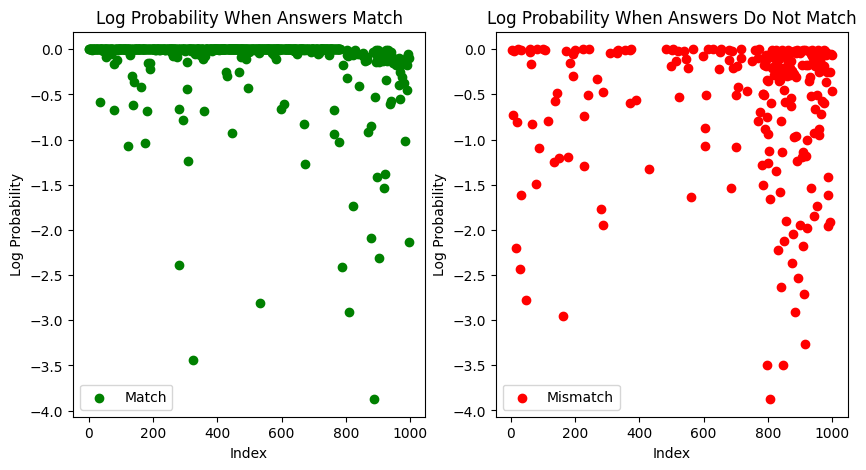

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_df is already created
# Filter where correct_answer and predicted_answer match
match_df = new_df[new_df['correct_answer'] == new_df['predicted_answer']]

# Filter where correct_answer and predicted_answer do not match
mismatch_df = new_df[new_df['correct_answer'] != new_df['predicted_answer']]

# Scatter plot for matches
plt.figure(figsize=(10, 5))

# Plot when answers match
plt.subplot(1, 2, 1)
plt.scatter(match_df.index, match_df['logprob'], color='green', label='Match')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Match")
plt.legend()

# Plot when answers do not match
plt.subplot(1, 2, 2)
plt.scatter(mismatch_df.index, mismatch_df['logprob'], color='red', label='Mismatch')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Do Not Match")
plt.legend()

In [28]:
# Calculate frequency of logprob > -0.1 for match_df
match_above_threshold = match_df[match_df['logprob'] > -0.1]
match_frequency = len(match_above_threshold) / len(match_df) if len(match_df) > 0 else 0

# Calculate frequency of logprob > -0.1 for mismatch_df
mismatch_above_threshold = mismatch_df[mismatch_df['logprob'] > -0.1]
mismatch_frequency = len(mismatch_above_threshold) / len(mismatch_df) if len(mismatch_df) > 0 else 0

# Display the frequencies and counts
print("Frequency of logprob > -0.1 when answers match:", match_frequency)
print("Count of logprob > -0.1 when answers match:", len(match_above_threshold))
print("Total correct answers: ", len(match_df))
print("Frequency of logprob > -0.1 when answers do not match:", mismatch_frequency)
print("Count of logprob > -0.1 when answers do not match:", len(mismatch_above_threshold))
print("Total wrong answers: ", len(mismatch_df))


Frequency of logprob > -0.1 when answers match: 0.9002624671916011
Count of logprob > -0.1 when answers match: 686
Total correct answers:  762
Frequency of logprob > -0.1 when answers do not match: 0.3487394957983193
Count of logprob > -0.1 when answers do not match: 83
Total wrong answers:  238


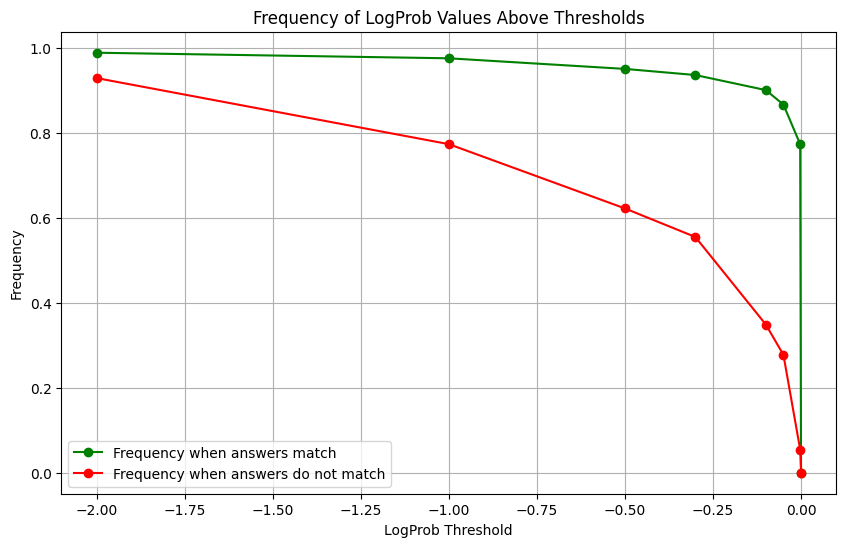

In [30]:
import matplotlib.pyplot as plt

# Define the thresholds you want to evaluate
thresholds = [-2, -1, -0.5, -0.3, -0.1, -0.05, -0.0025, 0.0]

# Initialize lists to store frequencies
match_frequencies = []
mismatch_frequencies = []

# Calculate frequencies for each threshold
for threshold in thresholds:
    # Frequency of logprob > threshold for match_df
    match_above_threshold = match_df[match_df['logprob'] > threshold]
    match_frequency = len(match_above_threshold) / len(match_df) if len(match_df) > 0 else 0
    match_frequencies.append(match_frequency)
    
    # Frequency of logprob > threshold for mismatch_df
    mismatch_above_threshold = mismatch_df[mismatch_df['logprob'] > threshold]
    mismatch_frequency = len(mismatch_above_threshold) / len(mismatch_df) if len(mismatch_df) > 0 else 0
    mismatch_frequencies.append(mismatch_frequency)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, match_frequencies, label='Frequency when answers match', marker='o', color='green')
plt.plot(thresholds, mismatch_frequencies, label='Frequency when answers do not match', marker='o', color='red')

# Adding titles and labels
plt.title("Frequency of LogProb Values Above Thresholds")
plt.xlabel("LogProb Threshold")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()